In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
from xgcm import Grid

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [32]:
%cd /glade/u/home/eyankovsky/MOM6-examples/ocean_only/my_single_column/KPP
#fs = xr.open_dataset('KPP/static.nc', decode_times=False)
# os = xr.open_dataset('ocean.stats.nc', decode_times=False)
# ds = xr.open_dataset('prog.nc', decode_times=False)  
# MARBL = xr.open_dataset('marbl.nc', decode_times=False)
prog = xr.open_dataset('prog_z.nc', decode_times=False)

forcing = xr.open_dataset('surffluxes.nc', decode_times=False)

/glade/u/home/eyankovsky/MOM6-examples/ocean_only/my_single_column/KPP


In [33]:
prog

<xarray.Dataset>
Dimensions:      (Time: 36500, xh: 2, xq: 3, yh: 2, yq: 3, z_i: 35, z_l: 34, zl: 75)
Coordinates:
  * xq           (xq) float64 -30.0 -29.5 -29.0
  * yh           (yh) float64 31.25 31.75
  * z_l          (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03
  * z_i          (z_i) float64 0.0 5.0 15.0 25.0 ... 5.25e+03 5.75e+03 6.25e+03
  * Time         (Time) float64 1.0 2.0 3.0 4.0 ... 3.65e+04 3.65e+04 3.65e+04
  * xh           (xh) float64 -29.75 -29.25
  * yq           (yq) float64 31.0 31.5 32.0
  * zl           (zl) float64 1.0 3.0 5.0 7.0 ... 5.432e+03 5.659e+03 5.886e+03
Data variables:
    u            (Time, z_l, yh, xq) float32 ...
    v            (Time, z_l, yq, xh) float32 ...
    temp         (Time, z_l, yh, xh) float32 ...
    salt         (Time, z_l, yh, xh) float32 ...
    PO4          (Time, zl, yh, xh) float32 ...
    NO3          (Time, zl, yh, xh) float32 ...
    SiO3         (Time, zl, yh, xh) float32 ...
    NH4          (Time, zl, yh, xh) float32 ...
    Fe           (Time, zl, yh, xh) float32 ...
    Lig          (Time, zl, yh, xh) float32 ...
    O2           (Time, zl, yh, xh) float32 ...
    DIC          (Time, zl, yh, xh) float32 ...
    DIC_ALT_CO2  (Time, zl, yh, xh) float32 ...
    ALK          (Time, zl, yh, xh) float32 ...
    ALK_ALT_CO2  (Time, zl, yh, xh) float32 ...
    DOC          (Time, zl, yh, xh) float32 ...
    DON          (Time, zl, yh, xh) float32 ...
    DOP          (Time, zl, yh, xh) float32 ...
    DOPr         (Time, zl, yh, xh) float32 ...
    DONr         (Time, zl, yh, xh) float32 ...
    DOCr         (Time, zl, yh, xh) float32 ...
    zooC         (Time, zl, yh, xh) float32 ...
    spChl        (Time, zl, yh, xh) float32 ...
    spC          (Time, zl, yh, xh) float32 ...
    spP          (Time, zl, yh, xh) float32 ...
    spFe         (Time, zl, yh, xh) float32 ...
    spCaCO3      (Time, zl, yh, xh) float32 ...
    diatChl      (Time, zl, yh, xh) float32 ...
    diatC        (Time, zl, yh, xh) float32 ...
    diatP        (Time, zl, yh, xh) float32 ...
    diatFe       (Time, zl, yh, xh) float32 ...
    diatSi       (Time, zl, yh, xh) float32 ...
    diazChl      (Time, zl, yh, xh) float32 ...
    diazC        (Time, zl, yh, xh) float32 ...
    diazP        (Time, zl, yh, xh) float32 ...
    diazFe       (Time, zl, yh, xh) float32 ...
Attributes:
    NumFilesInSet:  1
    title:          MOM Experiment
    grid_type:      regular
    grid_tile:      N/A

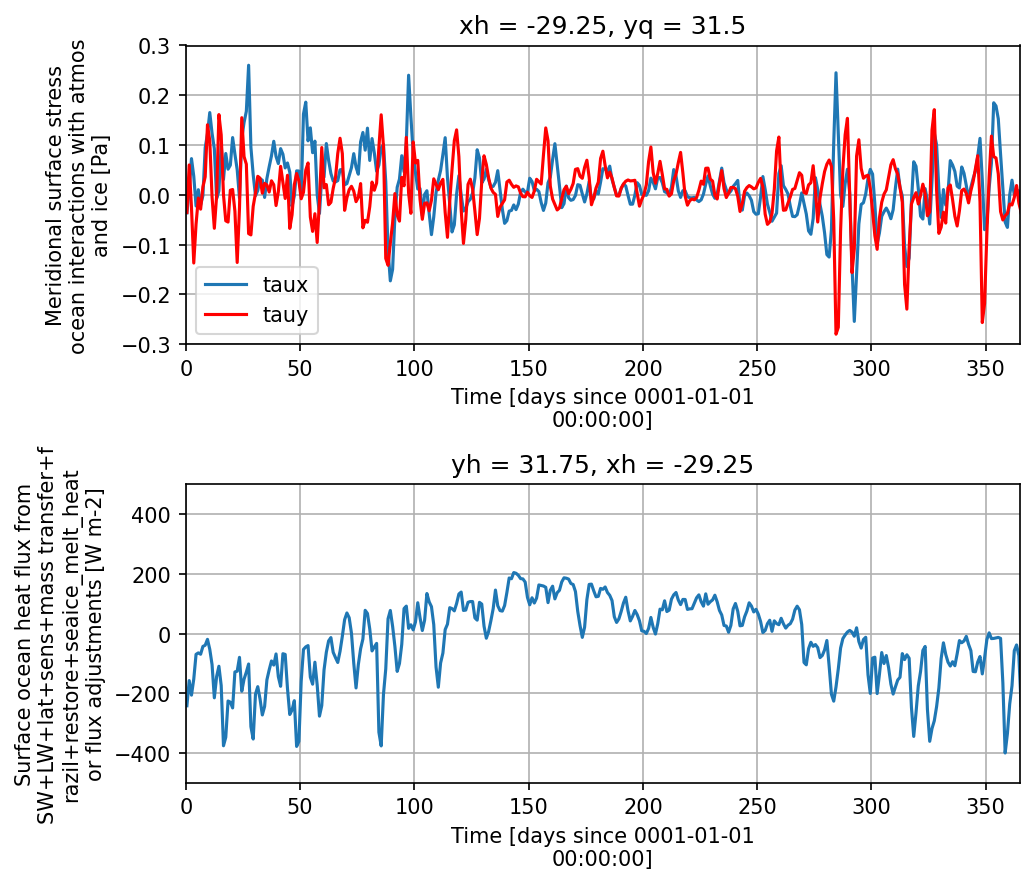

In [5]:
fig = plt.figure(figsize=(7, 6),dpi=150)

timelim=365
plt.subplot(2,1,1)
forcing.taux[:,1,1].plot(label='taux')
forcing.tauy[:,1,1].plot(color='r',label='tauy')
plt.legend(); plt.grid('on'); plt.xlim([0,timelim]); plt.ylim([-0.3,0.3])

plt.subplot(2,1,2)
forcing.net_heat_surface[:,1,1].plot()
plt.grid('on'); 
plt.xlim([0,timelim]); plt.ylim([-500,500])
fig.tight_layout()


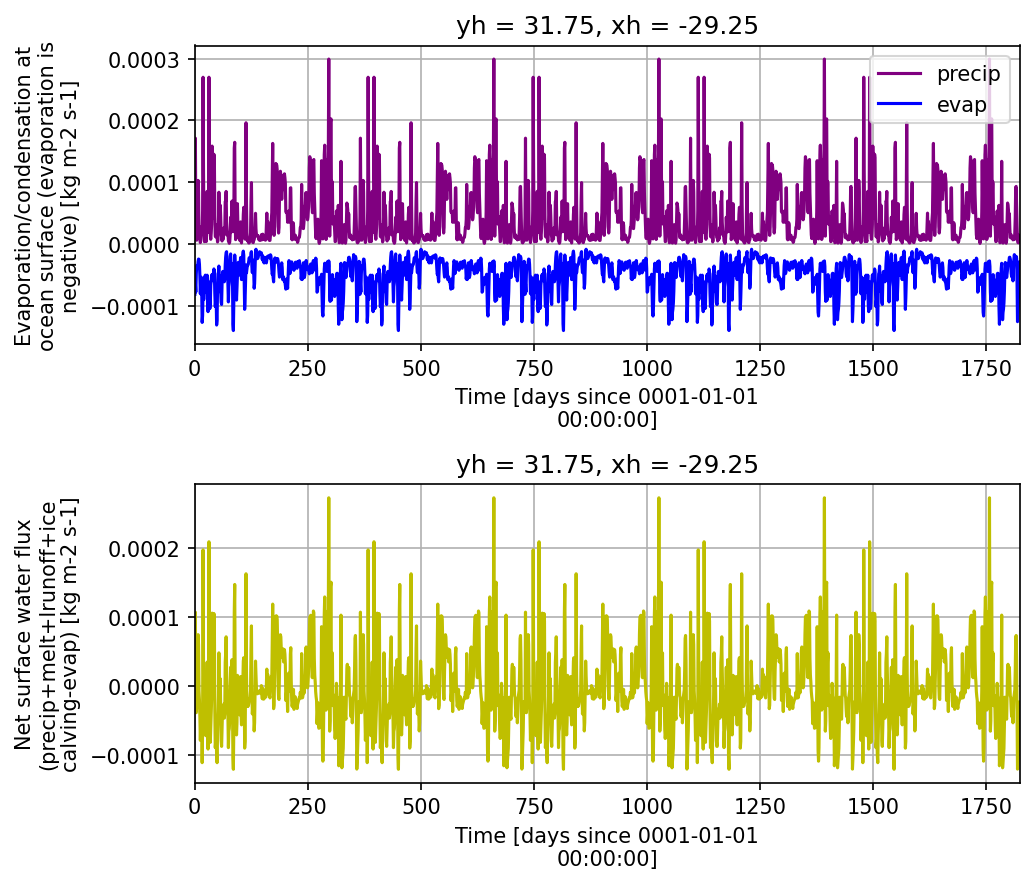

In [6]:
fig = plt.figure(figsize=(7, 6),dpi=150)

plt.subplot(2,1,1)
forcing.precip[:,1,1].plot(label='precip',color='purple')
forcing.evap[:,1,1].plot(label='evap',color='blue')
plt.legend(); plt.grid('on'); plt.xlim([0,1825]); #plt.ylim([-0.3,0.3])

plt.subplot(2,1,2)
forcing.PRCmE[:,1,1].plot(color='y')
plt.grid('on'); 
plt.xlim([0,1825]); #plt.ylim([-500,500])
fig.tight_layout()


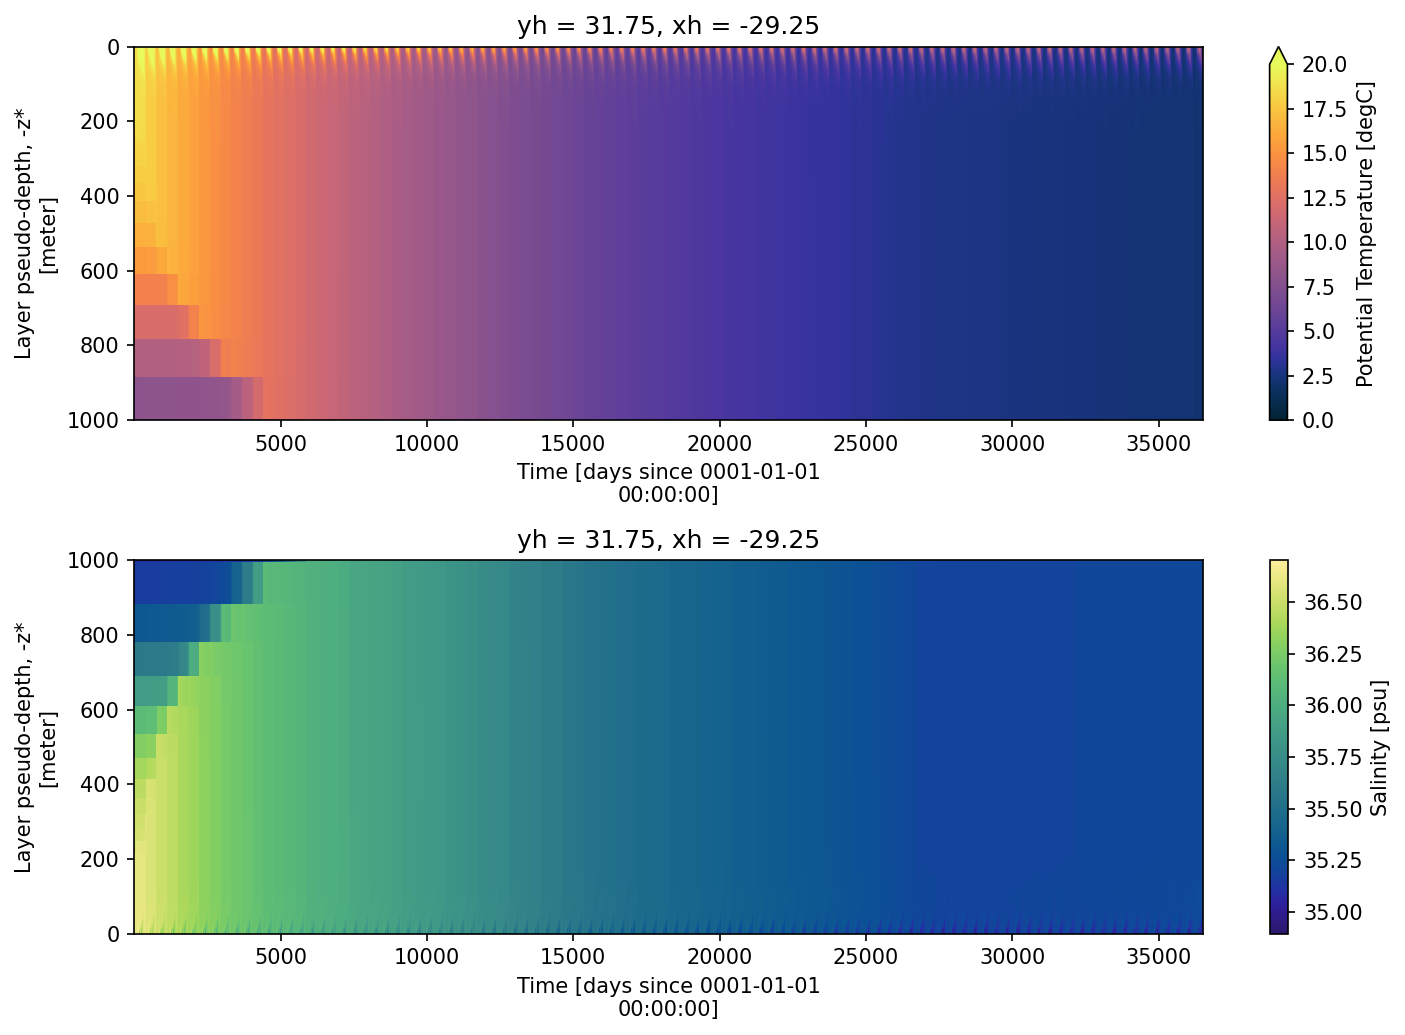

In [48]:
fig = plt.figure(figsize=(10, 7),dpi=150)
plt.subplot(2,1,1)
ds.temp[:,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.thermal,vmin=0,vmax=20)
plt.gca().invert_yaxis()
plt.ylim([1000,0]);

plt.subplot(2,1,2)
ds.salt[:,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.haline)
plt.ylim([1000,0]);

plt.gca().invert_yaxis()

fig.tight_layout()


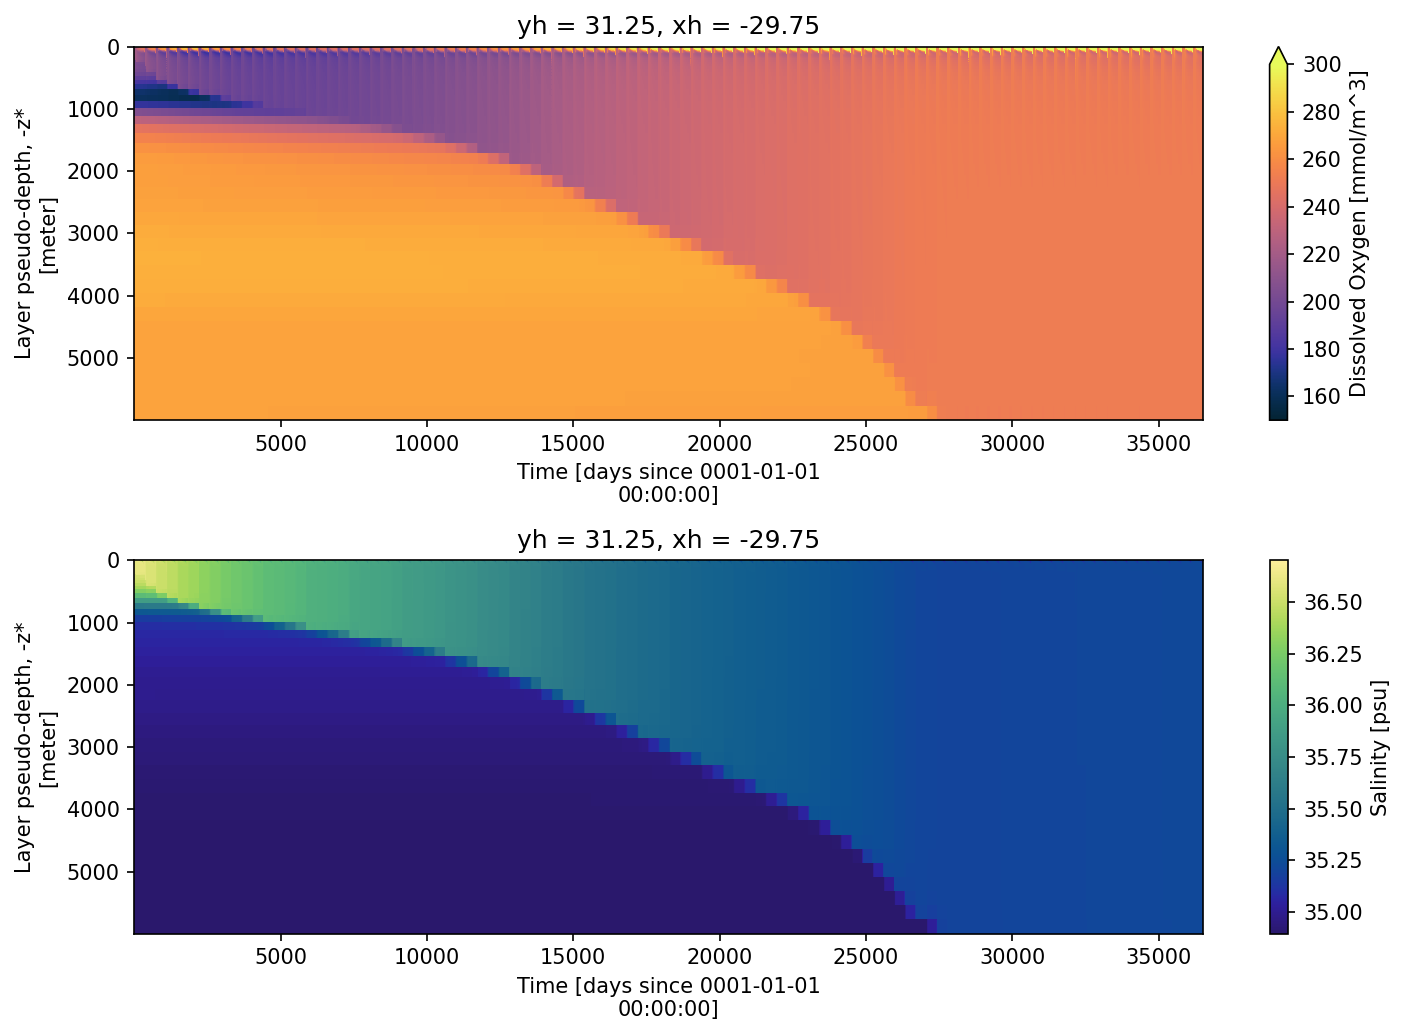

In [47]:
fig = plt.figure(figsize=(10, 7),dpi=150)
plt.subplot(2,1,1)
prog.O2[:,:,0,0].transpose('zl','Time',).plot(cmap=cmocean.cm.thermal,vmin=150,vmax=300)
plt.gca().invert_yaxis()

plt.subplot(2,1,2)
ds.salt[:,:,0,0].transpose('zl','Time',).plot(cmap=cmocean.cm.haline)
plt.gca().invert_yaxis()

fig.tight_layout()


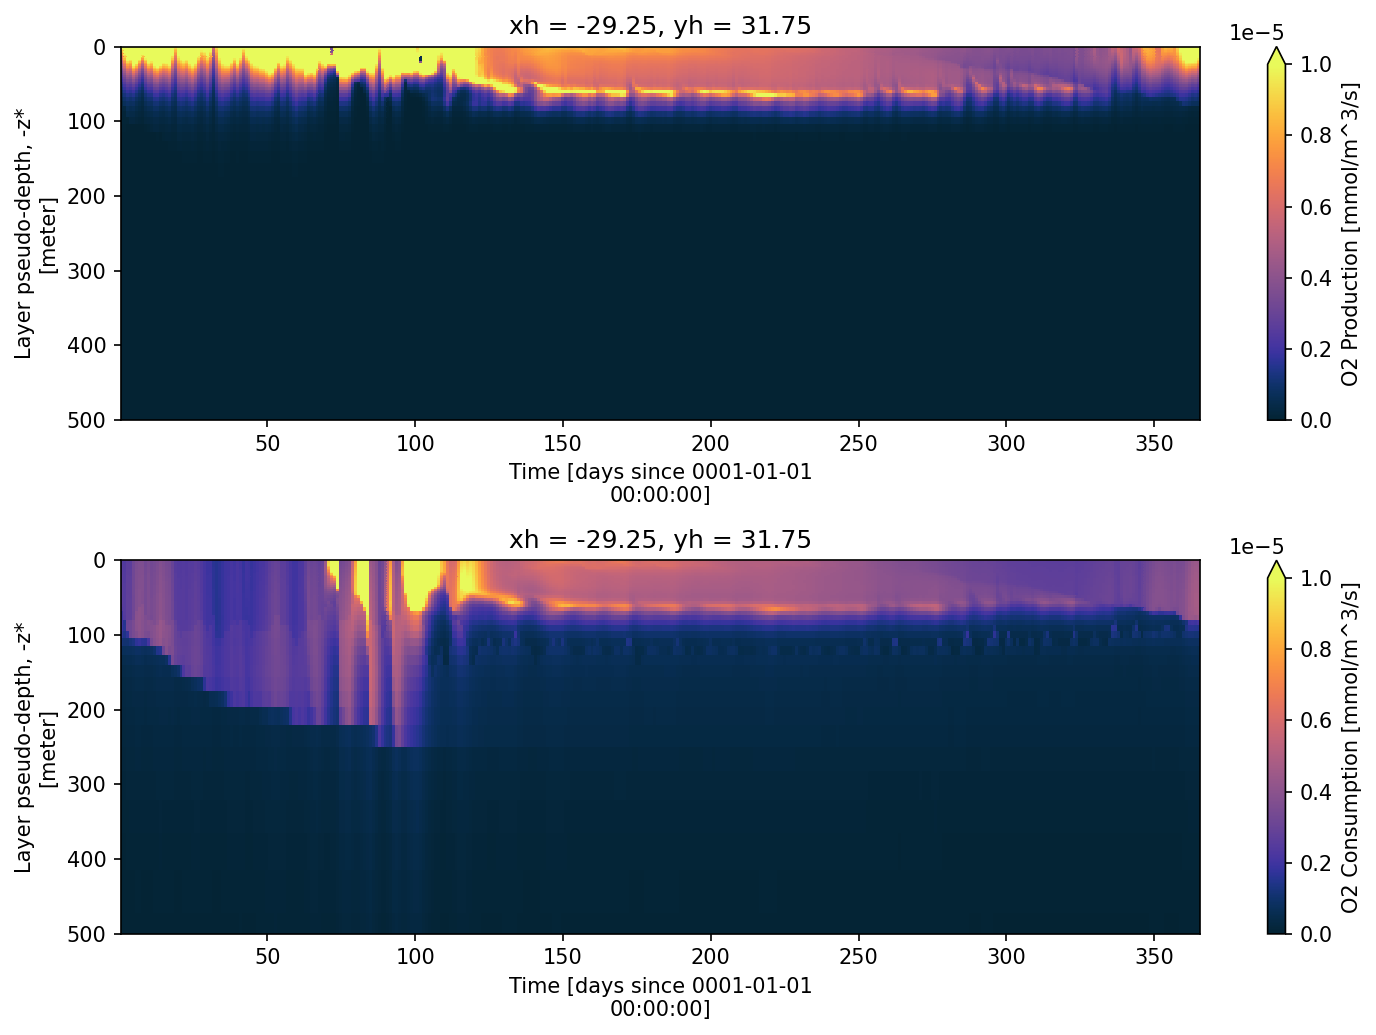

In [27]:
fig = plt.figure(figsize=(10, 7),dpi=150)
plt.subplot(2,1,1)
timelim=365
MARBL.O2_PRODUCTION[0:timelim,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.thermal,vmin=0,vmax=1e-5)
plt.gca().invert_yaxis()
plt.ylim([500,0])

plt.subplot(2,1,2)
MARBL.O2_CONSUMPTION[0:timelim,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.thermal,vmin=0,vmax=1e-5)
plt.gca().invert_yaxis()
plt.ylim([500,0])

fig.tight_layout()


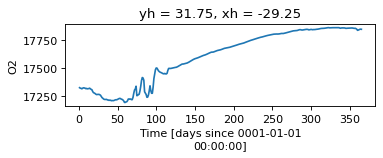

In [49]:
fig = plt.figure(figsize=(5, 3),dpi=80)
plt.subplot(2,1,1)
timelim=365
prog.O2[0:timelim,:,1,1].sum('zl').plot()
#plt.gca().invert_yaxis()
#plt.ylim([500,0])

In [54]:
MARBL

<xarray.Dataset>
Dimensions:                          (Time: 36500, xh: 2, yh: 2, zl: 75)
Coordinates:
  * xh                               (xh) float64 -29.75 -29.25
  * yh                               (yh) float64 31.25 31.75
  * Time                             (Time) float64 1.0 2.0 ... 3.65e+04
  * zl                               (zl) float64 1.0 3.0 ... 5.886e+03
Data variables:
    ECOSYS_IFRAC                     (Time, yh, xh) float32 ...
    ECOSYS_XKW                       (Time, yh, xh) float32 ...
    ECOSYS_ATM_PRESS                 (Time, yh, xh) float32 ...
    SCHMIDT_O2                       (Time, yh, xh) float32 ...
    O2SAT                            (Time, yh, xh) float32 ...
    CO2STAR                          (Time, yh, xh) float32 ...
    DCO2STAR                         (Time, yh, xh) float32 ...
    pCO2SURF                         (Time, yh, xh) float32 ...
    DpCO2                            (Time, yh, xh) float32 ...
    SCHMIDT_CO2                      (Time, yh, xh) float32 ...
    FG_CO2                           (Time, yh, xh) float32 ...
    PH                               (Time, yh, xh) float32 ...
    ATM_CO2                          (Time, yh, xh) float32 ...
    CO2STAR_ALT_CO2                  (Time, yh, xh) float32 ...
    DCO2STAR_ALT_CO2                 (Time, yh, xh) float32 ...
    DpCO2_ALT_CO2                    (Time, yh, xh) float32 ...
    FG_ALT_CO2                       (Time, yh, xh) float32 ...
    PH_ALT_CO2                       (Time, yh, xh) float32 ...
    ATM_ALT_CO2                      (Time, yh, xh) float32 ...
    IRON_FLUX                        (Time, yh, xh) float32 ...
    DUST_FLUX                        (Time, yh, xh) float32 ...
    NOx_FLUX                         (Time, yh, xh) float32 ...
    NHy_FLUX                         (Time, yh, xh) float32 ...
    NHx_SURFACE_EMIS                 (Time, yh, xh) float32 ...
    zsatcalc                         (Time, yh, xh) float32 ...
    zsatarag                         (Time, yh, xh) float32 ...
    O2_ZMIN                          (Time, yh, xh) float32 ...
    O2_ZMIN_DEPTH                    (Time, yh, xh) float32 ...
    photoC_TOT_zint                  (Time, yh, xh) float32 ...
    photoC_TOT_zint_100m             (Time, yh, xh) float32 ...
    photoC_NO3_TOT_zint              (Time, yh, xh) float32 ...
    photoC_NO3_TOT_zint_100m         (Time, yh, xh) float32 ...
    DOC_prod_zint                    (Time, yh, xh) float32 ...
    DOC_prod_zint_100m               (Time, yh, xh) float32 ...
    DOC_remin_zint                   (Time, yh, xh) float32 ...
    DOC_remin_zint_100m              (Time, yh, xh) float32 ...
    DOCr_remin_zint                  (Time, yh, xh) float32 ...
    DOCr_remin_zint_100m             (Time, yh, xh) float32 ...
    calcToSed                        (Time, yh, xh) float32 ...
    calcToSed_ALT_CO2                (Time, yh, xh) float32 ...
    pocToSed                         (Time, yh, xh) float32 ...
    ponToSed                         (Time, yh, xh) float32 ...
    SedDenitrif                      (Time, yh, xh) float32 ...
    popToSed                         (Time, yh, xh) float32 ...
    bsiToSed                         (Time, yh, xh) float32 ...
    dustToSed                        (Time, yh, xh) float32 ...
    pfeToSed                         (Time, yh, xh) float32 ...
    sp_N_lim_surf                    (Time, yh, xh) float32 ...
    sp_N_lim_Cweight_avg_100m        (Time, yh, xh) float32 ...
    sp_P_lim_surf                    (Time, yh, xh) float32 ...
    sp_P_lim_Cweight_avg_100m        (Time, yh, xh) float32 ...
    sp_Fe_lim_surf                   (Time, yh, xh) float32 ...
    sp_Fe_lim_Cweight_avg_100m       (Time, yh, xh) float32 ...
    sp_light_lim_surf                (Time, yh, xh) float32 ...
    sp_light_lim_Cweight_avg_100m    (Time, yh, xh) float32 ...
    photoC_sp_zint                   (Time, yh, xh) float32 ...
    photoC_sp_zint_100m   

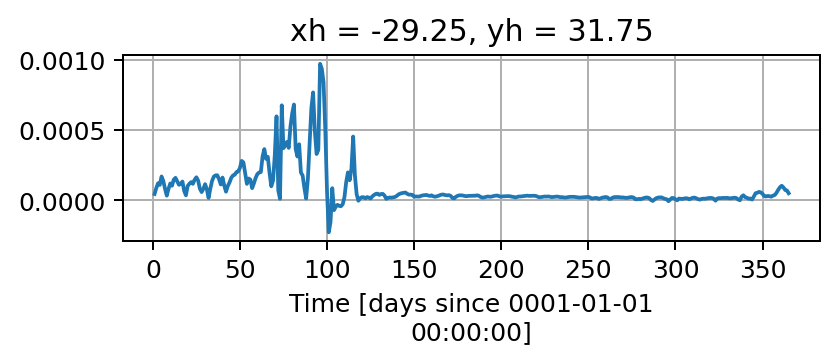

In [51]:
fig = plt.figure(figsize=(5, 3),dpi=180)
plt.subplot(2,1,1)
timelim=365
(MARBL.O2_PRODUCTION[0:timelim,:,1,1]-MARBL.O2_CONSUMPTION[0:timelim,:,1,1]).sum('zl').plot()
plt.grid()
#plt.gca().invert_yaxis()
#plt.ylim([500,0])

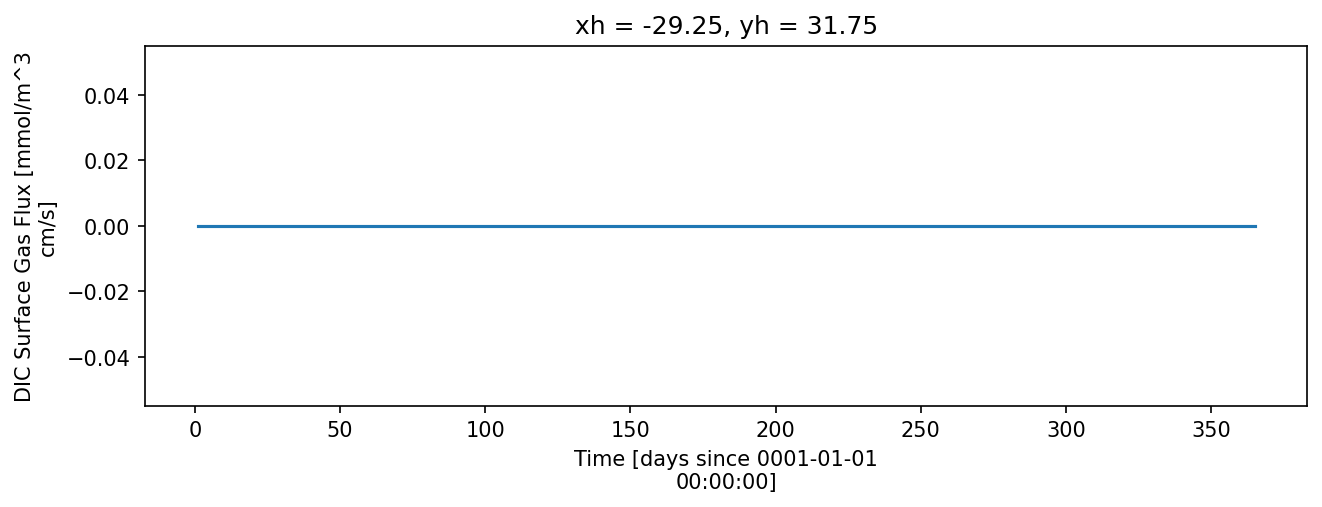

In [40]:
fig = plt.figure(figsize=(10, 7),dpi=150)
plt.subplot(2,1,1)
timelim=365
(MARBL.FG_CO2[0:timelim,1,1]).plot()
#plt.gca().invert_yaxis()
#plt.ylim([500,0])

In [41]:
prog

<xarray.Dataset>
Dimensions:      (Time: 36500, xh: 2, xq: 3, yh: 2, yq: 3, z_i: 35, z_l: 34, zl: 75)
Coordinates:
  * xq           (xq) float64 -30.0 -29.5 -29.0
  * yh           (yh) float64 31.25 31.75
  * z_l          (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03
  * z_i          (z_i) float64 0.0 5.0 15.0 25.0 ... 5.25e+03 5.75e+03 6.25e+03
  * Time         (Time) float64 1.0 2.0 3.0 4.0 ... 3.65e+04 3.65e+04 3.65e+04
  * xh           (xh) float64 -29.75 -29.25
  * yq           (yq) float64 31.0 31.5 32.0
  * zl           (zl) float64 1.0 3.0 5.0 7.0 ... 5.432e+03 5.659e+03 5.886e+03
Data variables:
    u            (Time, z_l, yh, xq) float32 ...
    v            (Time, z_l, yq, xh) float32 ...
    temp         (Time, z_l, yh, xh) float32 ...
    salt         (Time, z_l, yh, xh) float32 ...
    PO4          (Time, zl, yh, xh) float32 ...
    NO3          (Time, zl, yh, xh) float32 ...
    SiO3         (Time, zl, yh, xh) float32 ...
    NH4          (Time, zl, yh, xh) float32 ...
    Fe           (Time, zl, yh, xh) float32 ...
    Lig          (Time, zl, yh, xh) float32 ...
    O2           (Time, zl, yh, xh) float32 ...
    DIC          (Time, zl, yh, xh) float32 ...
    DIC_ALT_CO2  (Time, zl, yh, xh) float32 ...
    ALK          (Time, zl, yh, xh) float32 ...
    ALK_ALT_CO2  (Time, zl, yh, xh) float32 ...
    DOC          (Time, zl, yh, xh) float32 ...
    DON          (Time, zl, yh, xh) float32 ...
    DOP          (Time, zl, yh, xh) float32 ...
    DOPr         (Time, zl, yh, xh) float32 ...
    DONr         (Time, zl, yh, xh) float32 ...
    DOCr         (Time, zl, yh, xh) float32 ...
    zooC         (Time, zl, yh, xh) float32 ...
    spChl        (Time, zl, yh, xh) float32 ...
    spC          (Time, zl, yh, xh) float32 ...
    spP          (Time, zl, yh, xh) float32 ...
    spFe         (Time, zl, yh, xh) float32 ...
    spCaCO3      (Time, zl, yh, xh) float32 ...
    diatChl      (Time, zl, yh, xh) float32 ...
    diatC        (Time, zl, yh, xh) float32 ...
    diatP        (Time, zl, yh, xh) float32 ...
    diatFe       (Time, zl, yh, xh) float32 ...
    diatSi       (Time, zl, yh, xh) float32 ...
    diazChl      (Time, zl, yh, xh) float32 ...
    diazC        (Time, zl, yh, xh) float32 ...
    diazP        (Time, zl, yh, xh) float32 ...
    diazFe       (Time, zl, yh, xh) float32 ...
Attributes:
    NumFilesInSet:  1
    title:          MOM Experiment
    grid_type:      regular
    grid_tile:      N/A

In [23]:
(MARBL.O2_PRODUCTION).shape

(36500, 75, 2, 2)

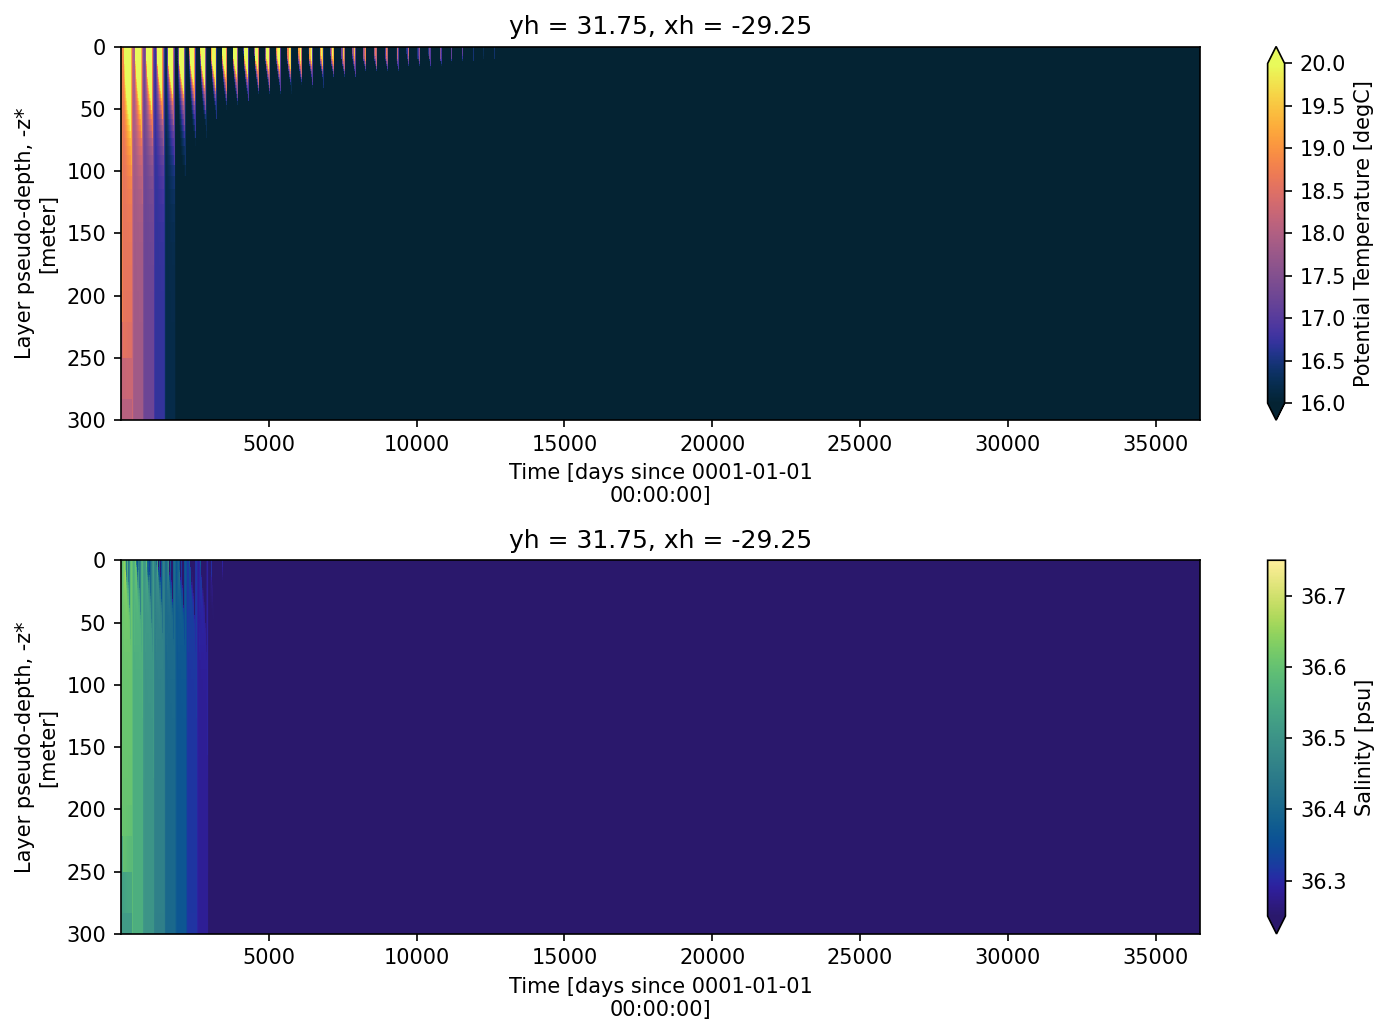

In [10]:
fig = plt.figure(figsize=(10, 7),dpi=150)
plt.subplot(2,1,1)
ds.temp[:,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.thermal,vmin=16,vmax=20)
plt.ylim([0,300])
plt.gca().invert_yaxis()

plt.subplot(2,1,2)
ds.salt[:,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.haline,vmin=36.25,vmax=36.75)
plt.ylim([0,300])

plt.gca().invert_yaxis()

fig.tight_layout()

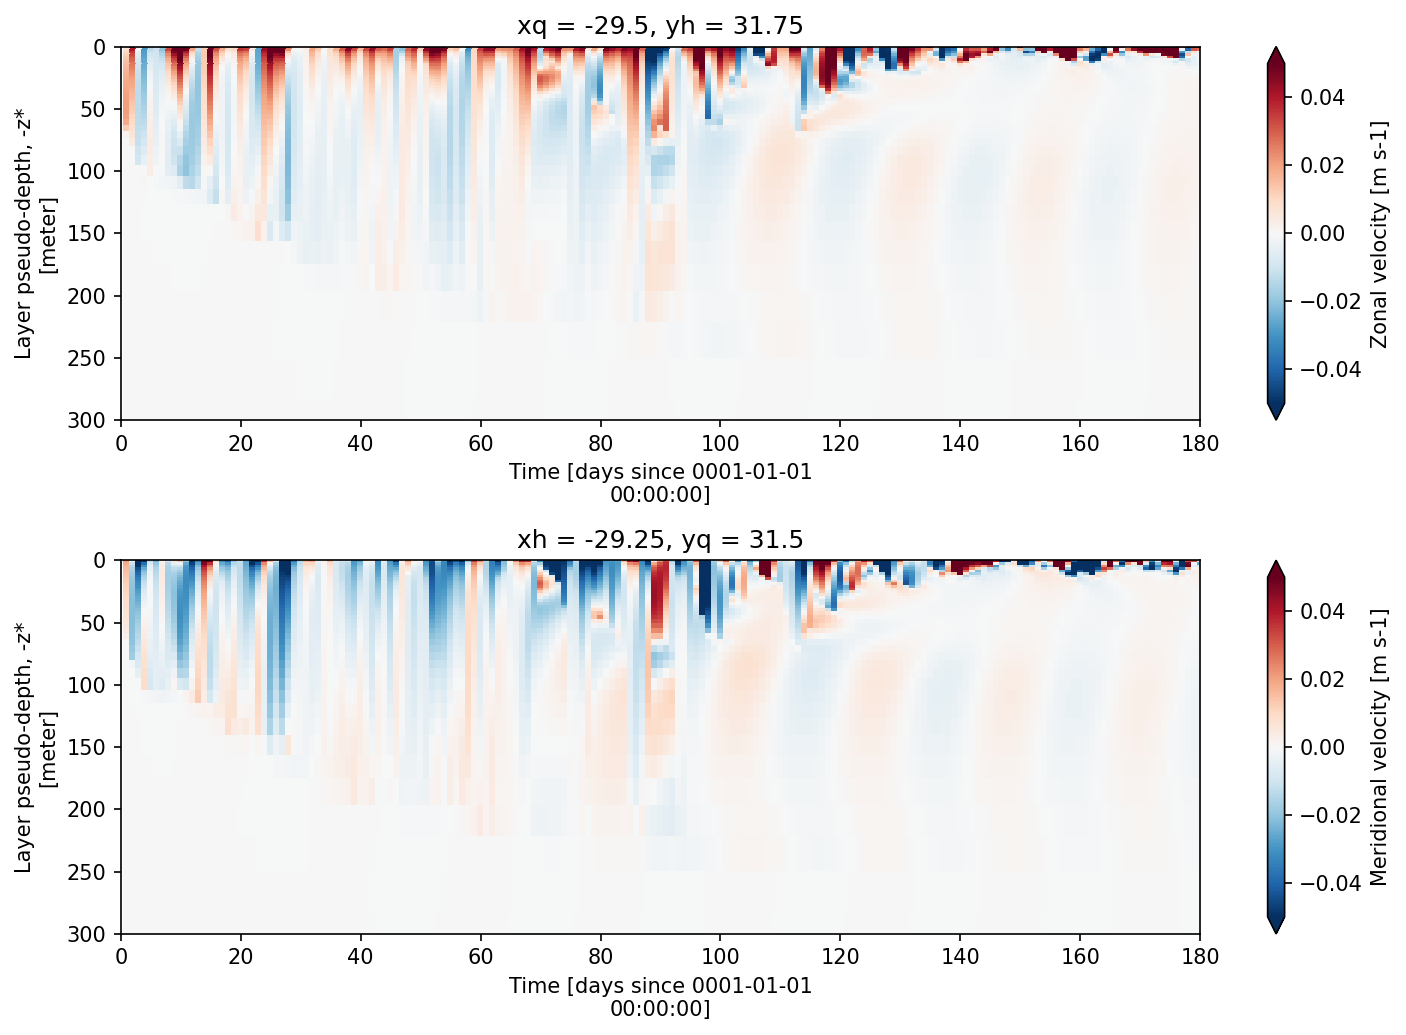

In [11]:
timelim=180
depthlim=300
fig = plt.figure(figsize=(10, 7),dpi=150)
plt.subplot(2,1,1)
ds.u[:,:,1,1].transpose('zl','Time',).plot(cmap=plt.cm.RdBu_r,vmin=-.05,vmax=0.05)
plt.xlim([0,timelim]); plt.ylim([0,depthlim])

plt.gca().invert_yaxis()

plt.subplot(2,1,2)
ds.v[:,:,1,1].transpose('zl','Time',).plot(cmap=plt.cm.RdBu_r,vmin=-.05,vmax=0.05)
plt.xlim([0,timelim]); plt.ylim([0,depthlim])

plt.gca().invert_yaxis()

fig.tight_layout()

In [68]:

grid= Grid(ds, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});


u = ds.u[:,:,:,:]; u=grid.interp(u,axis='X')
v = ds.v[-1,0,:];  v=grid.interp(v,axis='Y')

vel_mag = u**2+v**2

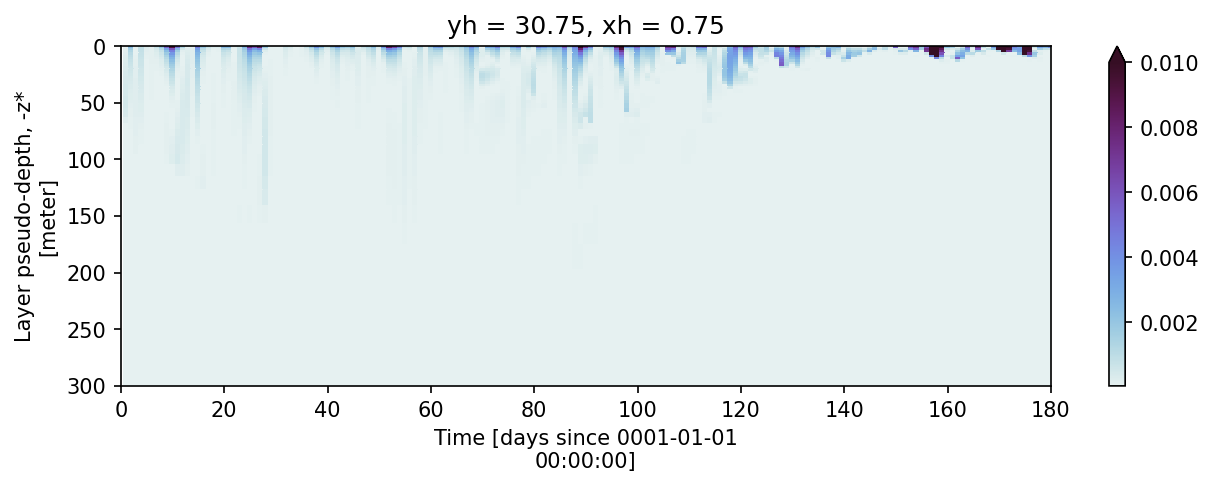

In [72]:
timelim=180
depthlim=300
fig = plt.figure(figsize=(10, 3),dpi=150)
plt.subplot(1,1,1)
vel_mag[:,:,1,1].transpose('zl','Time',).plot(cmap=cmocean.cm.dense,vmax=0.01)
plt.xlim([0,timelim]); plt.ylim([0,depthlim])

plt.gca().invert_yaxis()

In [66]:
%

0.0